In [1]:
import pandas as pd
import numpy as np


In [6]:
data=pd.read_csv("C:/Users/akshay/Downloads/data.csv")

In [8]:
print(data)


                                               Sentence Sentiment
0     The GeoSolutions technology will leverage Bene...  positive
1     $ESI on lows, down $1.50 to $2.50 BK a real po...  negative
2     For the last quarter of 2010 , Componenta 's n...  positive
3     According to the Finnish-Russian Chamber of Co...   neutral
4     The Swedish buyout firm has sold its remaining...   neutral
...                                                 ...       ...
5837  RISING costs have forced packaging producer Hu...  negative
5838  Nordic Walking was first used as a summer trai...   neutral
5839  According shipping company Viking Line , the E...   neutral
5840  In the building and home improvement trade , s...   neutral
5841  HELSINKI AFX - KCI Konecranes said it has won ...  positive

[5842 rows x 2 columns]


In [20]:
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [21]:
print(data['Sentence'])

0       The GeoSolutions technology will leverage Bene...
1       $ESI on lows, down $1.50 to $2.50 BK a real po...
2       For the last quarter of 2010 , Componenta 's n...
3       According to the Finnish-Russian Chamber of Co...
4       The Swedish buyout firm has sold its remaining...
                              ...                        
5837    RISING costs have forced packaging producer Hu...
5838    Nordic Walking was first used as a summer trai...
5839    According shipping company Viking Line , the E...
5840    In the building and home improvement trade , s...
5841    HELSINKI AFX - KCI Konecranes said it has won ...
Name: Sentence, Length: 5842, dtype: object


In [22]:
data.isna().any()

Sentence     False
Sentiment    False
dtype: bool

In [23]:
data_encoded=pd.get_dummies(data)     #convert categorical variable into neumerical format

In [24]:
x=data['Sentence']
y=data['Sentiment']

In [25]:
print(x)

0       The GeoSolutions technology will leverage Bene...
1       $ESI on lows, down $1.50 to $2.50 BK a real po...
2       For the last quarter of 2010 , Componenta 's n...
3       According to the Finnish-Russian Chamber of Co...
4       The Swedish buyout firm has sold its remaining...
                              ...                        
5837    RISING costs have forced packaging producer Hu...
5838    Nordic Walking was first used as a summer trai...
5839    According shipping company Viking Line , the E...
5840    In the building and home improvement trade , s...
5841    HELSINKI AFX - KCI Konecranes said it has won ...
Name: Sentence, Length: 5842, dtype: object


In [26]:
print(y)

0       positive
1       negative
2       positive
3        neutral
4        neutral
          ...   
5837    negative
5838     neutral
5839     neutral
5840     neutral
5841    positive
Name: Sentiment, Length: 5842, dtype: object


In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)      # Data split into training and testing

In [30]:
from sklearn.feature_extraction.text import CountVectorizer                            # Convert text data into neumerical format

In [32]:
vectorizer = CountVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)     #convert tet into matrix 

In [33]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(x_train_vec, y_train)

BernoulliNB()

In [34]:
y_pred = model.predict(x_test_vec)
y_pred

array(['positive', 'neutral', 'negative', ..., 'neutral', 'neutral',
       'neutral'], shape=(1169,), dtype='<U8')

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6860564585115483
Classification Report:
               precision    recall  f1-score   support

    negative       0.30      0.07      0.12       165
     neutral       0.70      0.90      0.78       620
    positive       0.71      0.61      0.66       384

    accuracy                           0.69      1169
   macro avg       0.57      0.53      0.52      1169
weighted avg       0.64      0.69      0.65      1169

Confusion Matrix:
 [[ 12  96  57]
 [ 26 555  39]
 [  2 147 235]]


In [36]:
confusionmetrix= confusion_matrix(y_test, y_pred)
confusionmetrix

array([[ 12,  96,  57],
       [ 26, 555,  39],
       [  2, 147, 235]])

In [37]:
accuracy=accuracy_score(y_test,y_pred)
print(f"\nACCURACY:{accuracy*100:.2f}%")


ACCURACY:68.61%


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'sentiment score')

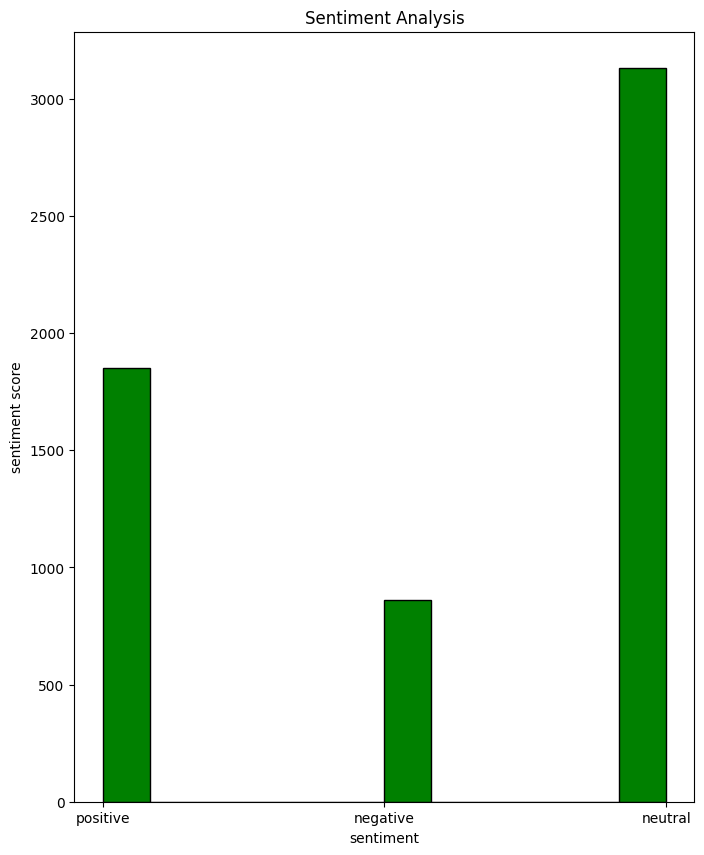

In [39]:
plt.figure(figsize=(8,10))
plt.hist(data['Sentiment'],bins=12,color='green',edgecolor='black')
plt.title('Sentiment Analysis')
plt.xlabel('sentiment')
plt.ylabel('sentiment score')


In [42]:
def test_sentiment(Sentence):
    vec = vectorizer.transform([Sentence])
    result = model.predict(vec)
    print(f"Sentiment: {result[0]}")

In [43]:
test_sentiment("The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .")
test_sentiment("The Swedish buyout firm has sold its remaining 22.4 percent stake , almost eighteen months after taking the company public in Finland .")
test_sentiment("SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANGE RELEASE OCTOBER 14 , 2008 AT 2:45 PM The Company updates its full year outlook and estimates its results to remain at loss for the full year .")
test_sentiment("Elcoteq SE is listed on the Nasdaq OMX Helsinki Ltd. .")

Sentiment: neutral
Sentiment: neutral
Sentiment: neutral
Sentiment: neutral
